# **CASE: PET SHOP**

---

### Instalação de bibliotecas

In [ ]:
# Para análise de cesta de compras
install.packages("arules")
install.packages("arulesViz")

### Carregamento de bibliotecas

In [ ]:
library(arules)
library(arulesViz)

### Leitura da base de dados

In [ ]:
dados_pet_shop <- read.table("Pet_Shop.txt",
                             sep = "\t",
                             header = TRUE)

In [ ]:
head(dados_pet_shop)

,ID_TRANSACAO,GRUPO_ITENS
,<int>,<chr>
1,1,racao_umida
2,1,guias
3,1,caixas_transporte
4,2,racao_seca
5,2,racao_umida
6,2,brinquedos


### Converter os dados para formato de transações

In [ ]:
transacoes <- as(split(dados_pet_shop$GRUPO_ITENS, dados_pet_shop$ID_TRANSACAO), "transactions")

### Visualizar as 10 primeiras transações

In [ ]:
inspect(transacoes[1:10])

     items                   transactionID
[1]  {caixas_transporte,                  
      guias,                              
      racao_umida}                      1 
[2]  {brinquedos,                         
      racao_seca,                         
      racao_umida}                      2 
[3]  {petiscos,                           
      roupas,                             
      vitaminas_suplementos}            3 
[4]  {camas,                              
      guias,                              
      vitaminas_suplementos}            4 
[5]  {petiscos,                           
      racao_umida}                      5 
[6]  {condicionadores,                    
      racao_seca,                         
      racao_umida}                      6 
[7]  {caixas_transporte,                  
      comedouros,                         
      condicionadores,                    
      petiscos}                         7 
[8]  {brinquedos,                         
      racao

### Análise exploratória

In [ ]:
# Distribuição da quantidade de categorias distintas por transação
table(size(transacoes))
prop.table(table(size(transacoes)))


    2     3     4 
50397 17113  6775 


        2         3         4 
0.6784277 0.2303695 0.0912028 

In [ ]:
# Tabela de frequências das categorias
frequencias <- sort(itemFrequency(transacoes), decreasing = TRUE)
View(as.data.frame(frequencias))

,frequencias
,<dbl>
petiscos,0.25259474
racao_seca,0.23304839
racao_umida,0.22152521
shampoos,0.14052635
brinquedos,0.12763007
tapetes_higienicos,0.12390119
camas,0.10955105
cobertores,0.09746248
comedouros,0.09657401


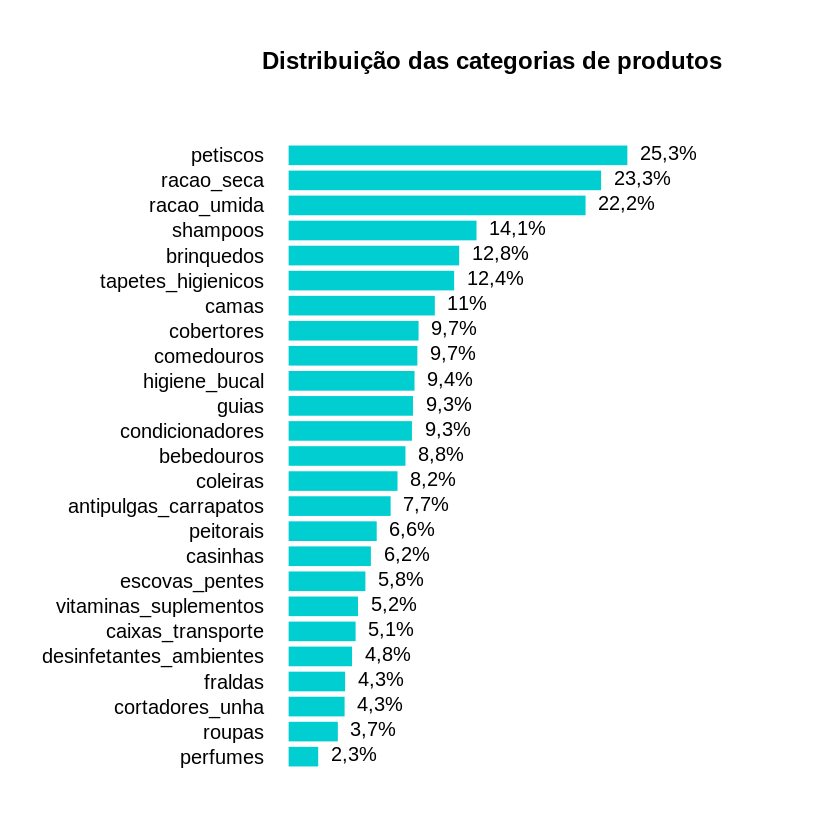

In [ ]:
# Gráfico de barras com frequências das categorias
par(mar = c(bottom = 2, left = 12, top = 5, right = 6))
bp <- barplot(rev(frequencias),
              horiz = TRUE,
              las = 1,
              axes = FALSE,
              xlim = c(0, max(frequencias) * 1.2),
              col = "darkturquoise",
              border = "white",
              main = "Distribuição das categorias de produtos")
text(x = rev(frequencias),
     y = bp,
     labels = paste0(sub("\\.", ",", round(rev(frequencias), 3) * 100), "%"),
     pos = 4,
     col = "black")

### Aplicação do algoritmo apriori

In [ ]:
regras <- apriori(transacoes, parameter = list(supp = 0.001, conf = 0.1, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[25 item(s), 74285 transaction(s)] done [0.02s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [255 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


### Remoção de regras redundantes

In [ ]:
regras <- regras[!is.redundant(regras)]

### Seleção de regras com lift maior do que 1

In [ ]:
regras <- subset(regras, lift > 1)

### Verificação das regras identificadas

In [ ]:
# Resumo
summary(regras)

set of 20 rules

rule length distribution (lhs + rhs):sizes
 2 
20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support           confidence        coverage            lift      
 Min.   :0.005937   Min.   :0.1052   Min.   :0.04251   Min.   :1.833  
 1st Qu.:0.010285   1st Qu.:0.1521   1st Qu.:0.06428   1st Qu.:2.028  
 Median :0.025005   Median :0.2517   Median :0.09389   Median :2.509  
 Mean   :0.028580   Mean   :0.2449   Mean   :0.10343   Mean   :2.470  
 3rd Qu.:0.027152   3rd Qu.:0.2823   3rd Qu.:0.12483   3rd Qu.:2.856  
 Max.   :0.102591   Max.   :0.4631   Max.   :0.25259   Max.   :3.304  
     count     
 Min.   : 441  
 1st Qu.: 764  
 Median :1858  
 Mean   :2123  
 3rd Qu.:2017  
 Max.   :7621  

mining info:
       data ntransactions support confidence
 transacoes         74285   0.001        0.1
                                                                               call
 aprio

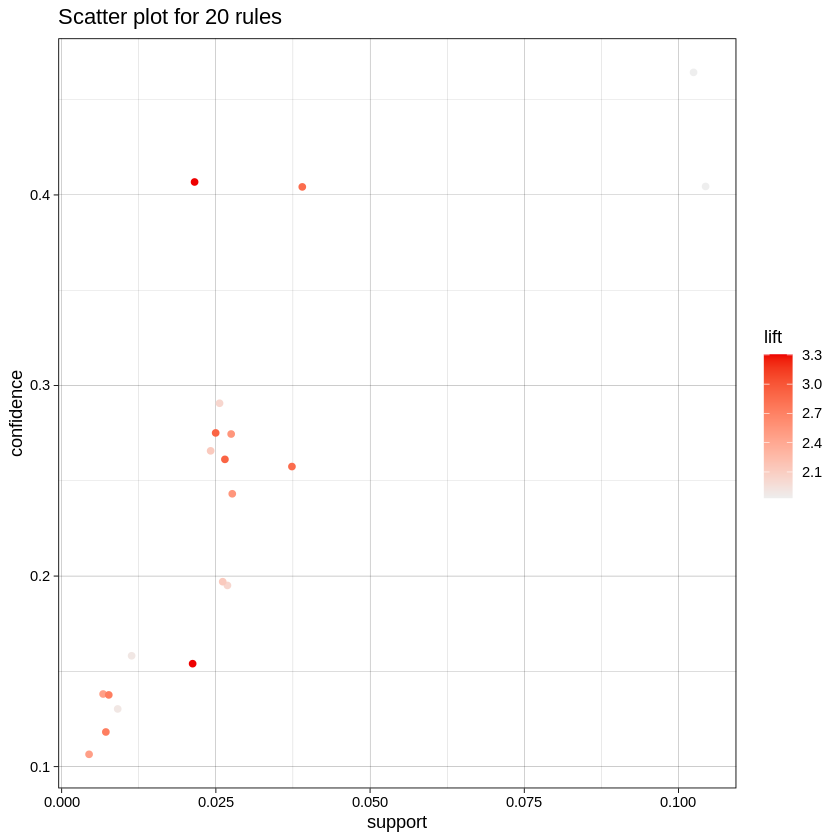

In [ ]:
# Examinar graficamente os indicadores (suporte, confiança, lift) das regras identificadas
plot(regras, jitter = TRUE)

In [ ]:
# Visualizar regras, da maior para a menor confiança
regras <- sort(regras, by = "confidence")
View(inspect(regras))

,lhs,,rhs,support,confidence,coverage,lift,count
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
[1],{racao_umida},=>,{petiscos},0.102591371,0.4631138,0.22152521,1.833426,7621
[2],{desinfetantes_ambientes},=>,{tapetes_higienicos},0.019667497,0.4093584,0.04804469,3.303910,1461
[3],{petiscos},=>,{racao_umida},0.102591371,0.4061501,0.25259474,1.833426,7621
[4],{condicionadores},=>,{shampoos},0.037140742,0.4013091,0.09254897,2.855757,2759
[5],{higiene_bucal},=>,{shampoos},0.026923336,0.2850221,0.09446052,2.028247,2000
[6],{bebedouros},=>,{comedouros},0.024688699,0.2814178,0.08772969,2.914012,1834
[7],{cobertores},=>,{camas},0.027152184,0.2785912,0.09746248,2.543026,2017
[8],{guias},=>,{brinquedos},0.025321397,0.2713503,0.09331628,2.126068,1881
[9],{shampoos},=>,{condicionadores},0.037140742,0.2642973,0.14052635,2.855757,2759


     lhs                          rhs                       support    
[1]  {racao_umida}             => {petiscos}                0.102591371
[2]  {desinfetantes_ambientes} => {tapetes_higienicos}      0.019667497
[3]  {petiscos}                => {racao_umida}             0.102591371
[4]  {condicionadores}         => {shampoos}                0.037140742
[5]  {higiene_bucal}           => {shampoos}                0.026923336
[6]  {bebedouros}              => {comedouros}              0.024688699
[7]  {cobertores}              => {camas}                   0.027152184
[8]  {guias}                   => {brinquedos}              0.025321397
[9]  {shampoos}                => {condicionadores}         0.037140742
[10] {comedouros}              => {bebedouros}              0.024688699
[11] {camas}                   => {cobertores}              0.027152184
[12] {brinquedos}              => {guias}                   0.025321397
[13] {shampoos}                => {higiene_bucal}           0.02

In [ ]:
# Extra: Matriz de lifts entre todas as patologias, duas a duas
View(crossTable(transacoes, measure = "lift"))

,antipulgas_carrapatos,bebedouros,brinquedos,caixas_transporte,camas,casinhas,cobertores,coleiras,comedouros,condicionadores,⋯,higiene_bucal,peitorais,perfumes,petiscos,racao_seca,racao_umida,roupas,shampoos,tapetes_higienicos,vitaminas_suplementos
antipulgas_carrapatos,NA,0.6680381,0.6695412,0.6681820,0.6118545,0.6928861,0.5563171,0.6175368,0.6141264,0.6294596,⋯,0.6445854,0.6793610,0.5900501,0.6557662,0.7024847,0.6431825,0.5382389,0.6105939,0.6217136,0.7092827
bebedouros,0.6680381,NA,0.5818950,0.6055060,0.5602679,0.5762390,0.5541885,0.6037778,2.9140122,0.5786369,⋯,0.5799228,0.5686611,0.6768158,0.6105118,0.6867370,0.5922366,0.6057451,0.5263099,0.6365608,0.5412603
brinquedos,0.6695412,0.5818950,NA,0.6680163,0.6267730,0.6884863,0.6146909,0.6122213,0.5810282,0.5949011,⋯,0.6208266,0.6276378,0.6494740,0.6292668,0.6987906,0.6213456,0.6555076,0.6192158,0.6401595,0.6495769
caixas_transporte,0.6681820,0.6055060,0.6680163,NA,0.6061198,0.6250033,0.6295200,0.6036941,0.6188100,0.6026744,⋯,0.5595485,0.6522119,0.5103693,0.5930480,0.7088907,0.6102807,0.6659457,0.6029314,0.5766494,0.5874558
camas,0.6118545,0.5602679,0.6267730,0.6061198,NA,0.6674314,2.5430258,0.6066423,0.6183841,0.5934966,⋯,0.5788846,0.6294009,0.5473679,0.5959284,0.6738559,0.5885381,0.5801383,0.5893651,0.6129080,0.6583712
casinhas,0.6928861,0.5762390,0.6884863,0.6250033,0.6674314,NA,0.6366810,0.6601789,0.6313052,0.6728273,⋯,0.6959621,0.6602536,0.7106428,0.6270351,0.6880050,0.5896124,0.5671466,0.6422866,0.6619263,0.6288094
cobertores,0.5563171,0.5541885,0.6146909,0.6295200,2.5430258,0.6366810,NA,0.6160604,0.6335850,0.5611484,⋯,0.5790369,0.6408823,0.6092277,0.5971175,0.6732768,0.5655169,0.5747275,0.6005441,0.6209279,0.6162536
coleiras,0.6175368,0.6037778,0.6122213,0.6036941,0.6066423,0.6601789,0.6160604,NA,0.6694223,0.6416578,⋯,0.6269314,1.8933345,0.6321896,0.6597099,0.6670426,0.6245119,0.5133690,0.6063730,0.6372849,0.7464952
comedouros,0.6141264,2.9140122,0.5810282,0.6188100,0.6183841,0.6313052,0.6335850,0.6694223,NA,0.5587801,⋯,0.5828883,0.6047797,0.6148325,0.5932296,0.6681065,0.6116201,0.6246314,0.5554806,0.5726390,0.6936834
condicionadores,0.6294596,0.5786369,0.5949011,0.6026744,0.5934966,0.6728273,0.5611484,0.6416578,0.5587801,NA,⋯,0.4881308,0.6464210,0.6352199,0.5424427,0.6540975,0.5535180,0.6207593,2.8557569,0.5658468,0.4964351
